In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb # 텍스트 데이터
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [4]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [5]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [6]:
word_to_index = imdb.get_word_index() # 어휘 사전 내려받기

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
word_to_index['film']

19

In [8]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [9]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [10]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [11]:
np.random.seed(42)
random_index = np.random.permutation(25000) # 인덱스 섞기

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

# 샘플 길이 맞추기
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [12]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [13]:
# 원-핫 인코딩
x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

print(x_train_onehot.shape)

(20000, 100, 100)


In [14]:
print(x_train_onehot.nbytes)

800000000


In [21]:
# 순환 신경망

class  RecurrentNetwork:

  def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
    self.n_cells = n_cells # 셀 개수
    self.batch_size = batch_size
    self.w1h = None # 은닉 상태의 가중치
    self.w1x = None # 입력의 가중치
    self.b1 = None  # 절편        - 순환층
    self.w2 = None  # 가중치      - 출력층
    self.b2 = None  # 절편        - 출력층 
    self.h = None   # 활성화 출력 - 순환층
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate

  # 정방향 계산
  def forpass(self, x):
    self.h = [np.zeros((x.shape[0], self.n_cells))] # 은닉 상태 초기화
    seq = np.swapaxes(x, 0, 1)

    # 순환층 선형식 계산
    for x in seq:
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
      h = np.tanh(z1) # 활성화 함수 적용
      self.h.append(h) # 은닉 상태 저장 - 역전파에서 사용
      z2 = np.dot(h, self.w2) + self.b2 # 출력층 선형식 계산
    return z2

  # 역방향 계산 
  def backprop(self, x, err):
    m = len(x)

    w2_grad = np.dot(self.h[-1].T, err) / m
    b2_grad = np.sum(err) / m
    seq = np.swapaxes(x, 0, 1)

    w1h_grad = w1x_grad = b1_grad = 0
    err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2) 
    for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
      w1h_grad += np.dot(h.T, err_to_cell)
      w1x_grad += np.dot(x.T, err_to_cell)
      b1_grad += np.sum(err_to_cell, axis=0)
      err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  # 가중치 초기화
  def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal() # 직교 행렬 초기화
    glorot_init = tf.initializers.GlorotUniform() # 글로럿 초기화 

    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()
    self.b1 = np.zeros(self.n_cells)
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()
    self.b2 = np.zeros(n_classes)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    np.random.seed(42)
    self.init_weights(x.shape[2], y.shape[1])
    for i in range(epochs):
      print('에포크', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end='')
        a = self.training(x_batch, y_batch)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))
      self.update_val_loss(x_val, y_val)
  
  # 미니 배치 제너레이터 함수
  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size # 미니 배치 횟수
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]
      
  def training(self, x, y):
    m = len(x)
    z = self.forpass(x)
    a = self.sigmoid(z)
    err = -(y - a)
    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    self.w1h -= self.lr * w1h_grad
    self.b1 -= self.lr * b1_grad
    return a

  def predict(self, x):
    z = self.forpass(x)
    return z > 0 # 스텝 함수 적용

  def score(self, x, y):
    return np.mean(self.predict(x) == y.reshape(-1, 1))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.sigmoid(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append(val_loss)

In [27]:
# 모델 훈련
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

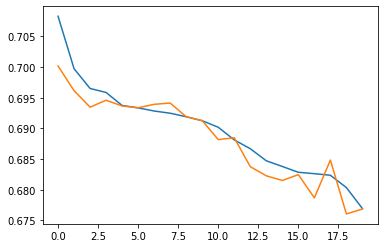

In [28]:
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [30]:
rn.score(x_val_onehot, y_val)

0.5736

In [47]:
# 텐서플로로 순환 신경망 구현

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense

In [48]:
# 훈련 데이터
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

# 샘플 길이 맞추기
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [49]:
# 모델 생성
model = Sequential()

model.add(Embedding(1000, 32))  # 임베딩층
# model.add(SimpleRNN(8))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 16s 23ms/step - loss: 0.5591 - accuracy: 0.7128 - val_loss: 0.3757 - val_accuracy: 0.8380
Epoch 2/10
625/625 [==============================] - 15s 23ms/step - loss: 0.3363 - accuracy: 0.8626 - val_loss: 0.3610 - val_accuracy: 0.8434
Epoch 3/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2981 - accuracy: 0.8788 - val_loss: 0.3554 - val_accuracy: 0.8414
Epoch 4/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2910 - accuracy: 0.8790 - val_loss: 0.3630 - val_accuracy: 0.8436
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2801 - accuracy: 0.8846 - val_loss: 0.3704 - val_accuracy: 0.8422
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2660 - accuracy: 0.8900 - val_loss: 0.3721 - val_accuracy: 0.8392
Epoch 7/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2456 - accuracy: 0.9008 - val_loss: 0.3844 - val_accuracy:

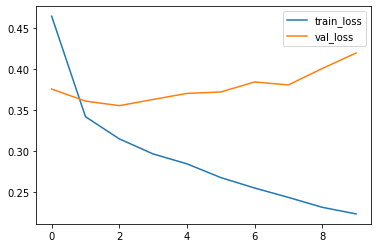

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

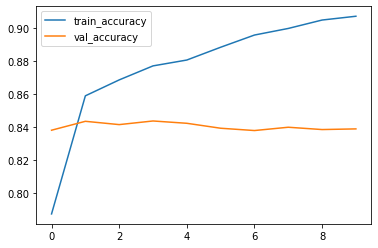

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [56]:
loss, accuracy = model.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8388000130653381
